In this case study , trainees are tasked with building a predictive model to identify fraudulent transactions for a financial company. The dataset provided contains 6,362,620 rows and 10 columns in CSV format. The goal is to develop a machine learning model that can effectively distinguish between legitimate and fraudulent transactions.

**Objective**
The main objective is to create a predictive model that can accurately classify transactions as either legitimate or fraudulent. This model will be based on the available data and will be used to make predictions on new, unseen data.

**Steps :-**

Introduction

Data Analysis

Data Exploration

Data Cleaning

Machine Learning Model

Conclusion

In [4]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
os.chdir(r'/content/drive/MyDrive/ML_module_end')

In [6]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.shape

(6362620, 11)

In [10]:
oridf = df.copy()

<Axes: >

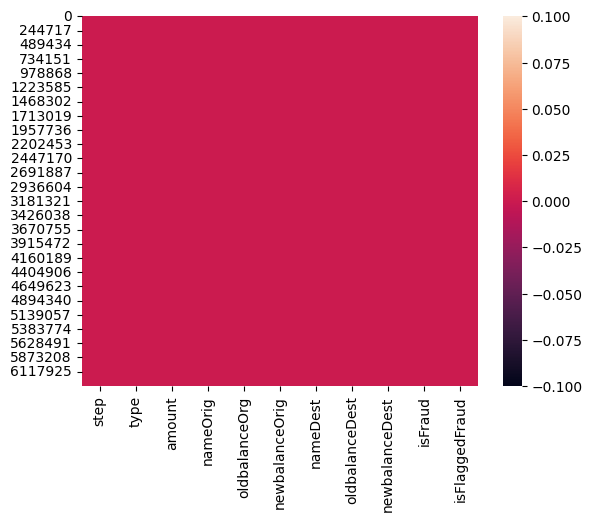

In [11]:
import seaborn as sns
sns.heatmap(df.isna())

In [12]:
print('Checking if we have any null values')
df.isnull().any()

Checking if we have any null values


step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool



In the data , there is no null values and the target column is "isFraud" which is the actual frad status of the transcation and isFalggedFraud is the indicator , that is used to flag the transcation using the threshold value.

In [13]:
print('Minimum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].min()

Minimum value of Amount, Old/New Balance of Origin/Destination:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

In [14]:
print('Maximum value of Amount, Old/New Balance of Origin/Destination:')
df[[ 'amount','oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()

Maximum value of Amount, Old/New Balance of Origin/Destination:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrig    4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

**Data Analysis :**

Since , there is no null and empty values in the columns so no data cleaning is needed.

But we will perform the data analysis on the columns as to see the variance in the columns.

In [15]:
#viewing the unique entity in the columns
for i in df.columns:
    print(i,':',len(df[i].unique()))

step : 743
type : 5
amount : 5316900
nameOrig : 6353307
oldbalanceOrg : 1845844
newbalanceOrig : 2682586
nameDest : 2722362
oldbalanceDest : 3614697
newbalanceDest : 3555499
isFraud : 2
isFlaggedFraud : 2


In [16]:
#Anaylsis of type columns
types = df.type.unique()
types

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
#Reading the numerical and the categorical features
cat_feature = list(df.select_dtypes('object').columns)
num_feature = [i for i in df.columns if i not in cat_feature]
print(cat_feature)
print(num_feature)

['type', 'nameOrig', 'nameDest']
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [18]:
#Separting the numneric data from the datasets
num_cols = df.select_dtypes(['int64','float64'])
num_cols.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [19]:
#Separting the categorical data from the datasets
cat_cols = df.select_dtypes(['object'])
cat_cols.columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [20]:
# Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['amount'].mean().sort_values(ascending = False).round(2)
mp_make

type
TRANSFER    910647.01
CASH_OUT    176273.96
CASH_IN     168920.24
PAYMENT      13057.60
DEBIT         5483.67
Name: amount, dtype: float64

In [21]:
# Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['oldbalanceOrg'].mean().sort_values(ascending = False).round(2)
mp_make

type
CASH_IN     3590463.51
DEBIT         68647.34
PAYMENT       68216.83
TRANSFER      54441.85
CASH_OUT      46023.80
Name: oldbalanceOrg, dtype: float64

In [22]:
# Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['newbalanceOrig'].mean().sort_values(ascending = False).round(2)
mp_make

type
CASH_IN     3759378.71
DEBIT         65161.65
PAYMENT       61837.89
CASH_OUT      17474.19
TRANSFER      10288.16
Name: newbalanceOrig, dtype: float64

In [23]:
# Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['oldbalanceDest'].mean().sort_values(ascending = False).round(2)
mp_make

type
TRANSFER    2567605.72
CASH_IN     1587918.80
CASH_OUT    1497757.89
DEBIT       1493135.77
PAYMENT           0.00
Name: oldbalanceDest, dtype: float64

In [24]:
# Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['newbalanceDest'].mean().sort_values(ascending = False).round(2)
mp_make

type
TRANSFER    3554566.83
CASH_OUT    1691326.07
DEBIT       1513003.47
CASH_IN     1467105.39
PAYMENT           0.00
Name: newbalanceDest, dtype: float64

In [25]:
# Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['isFlaggedFraud'].mean().sort_values(ascending = False).round(2)
mp_make

type
TRANSFER    0.0
CASH_IN     0.0
CASH_OUT    0.0
DEBIT       0.0
PAYMENT     0.0
Name: isFlaggedFraud, dtype: float64

In [26]:
#Predicting the mean of the type of transaction.
mp_make = df.groupby('type')['isFraud'].mean().sort_values(ascending = False).round(2)
mp_make

type
TRANSFER    0.01
CASH_OUT    0.00
CASH_IN     0.00
DEBIT       0.00
PAYMENT     0.00
Name: isFraud, dtype: float64

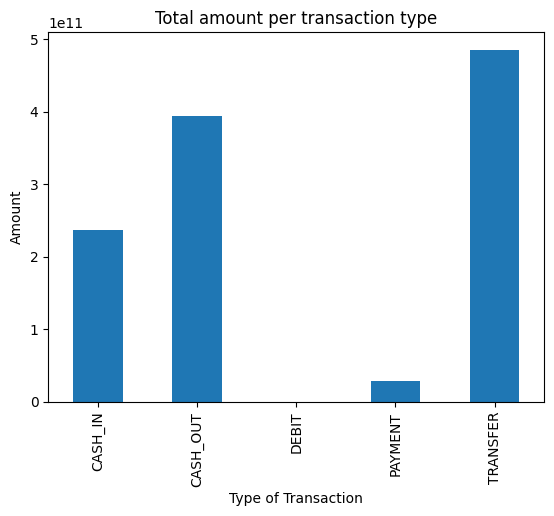

In [26]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

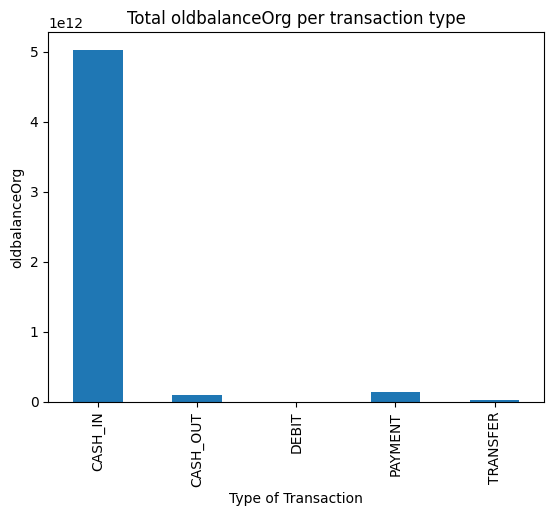

In [ ]:
var = df.groupby('type').oldbalanceOrg.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total oldbalanceOrg per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('oldbalanceOrg');

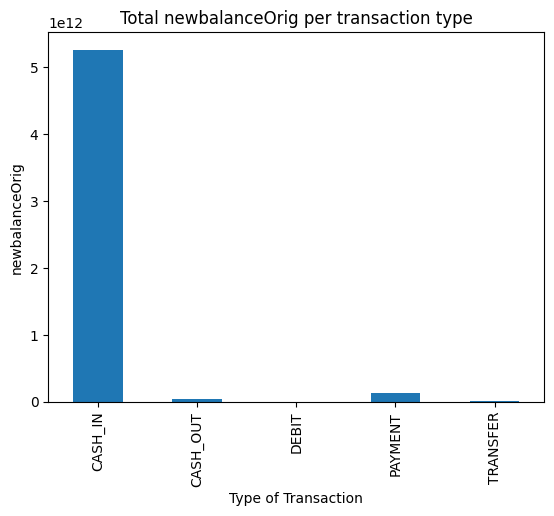

In [ ]:
var = df.groupby('type').newbalanceOrig.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total newbalanceOrig per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('newbalanceOrig');

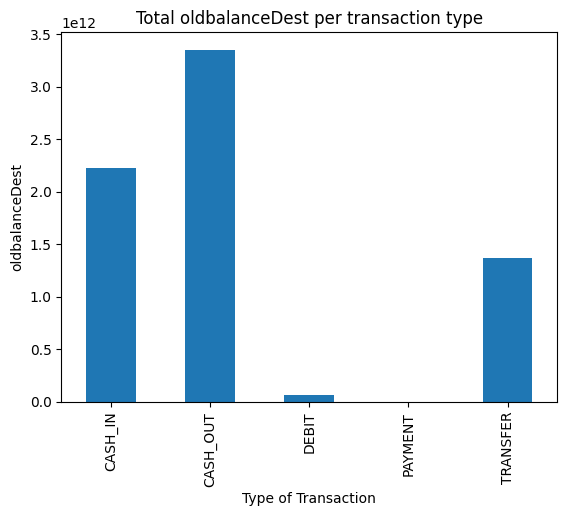

In [ ]:
var = df.groupby('type').oldbalanceDest.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total oldbalanceDest per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('oldbalanceDest');

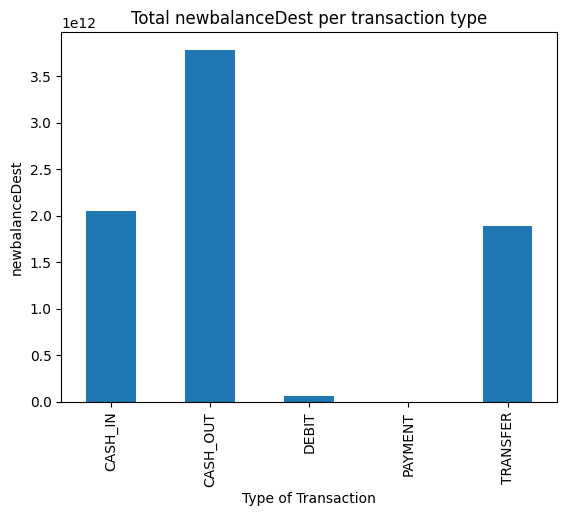

In [ ]:
var = df.groupby('type').newbalanceDest.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total newbalanceDest per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('newbalanceDest');

<ipython-input-49-eb87015b0914>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

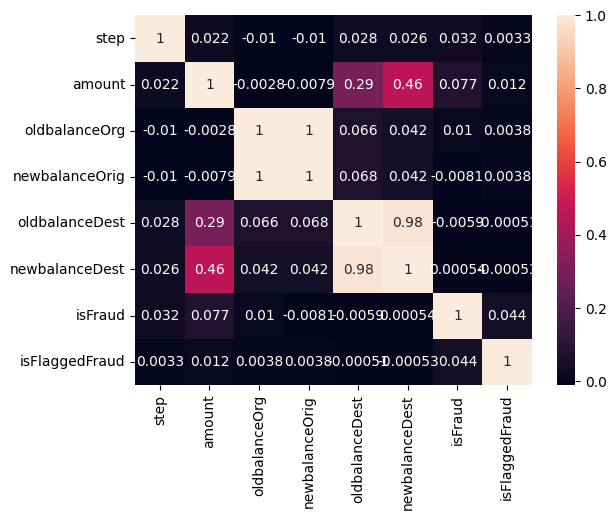

In [ ]:
#Anaysis the correlation coefficient features.

corr = df.corr()
sns.heatmap(corr,annot = True)


In [27]:
df.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

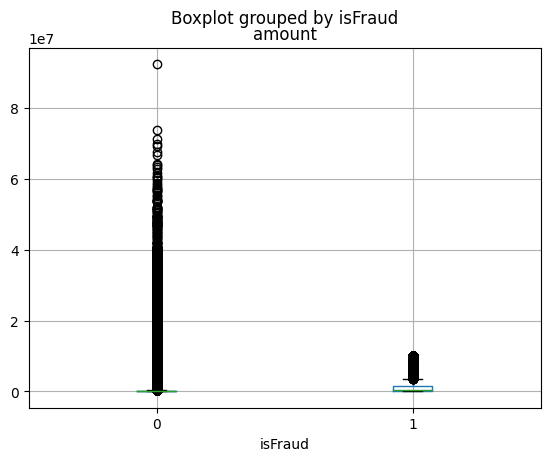

In [78]:
df.boxplot(column='amount', by='isFraud')

<ipython-input-29-cb7d29db35e5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  piedata = df.groupby(['isFlaggedFraud']).sum()


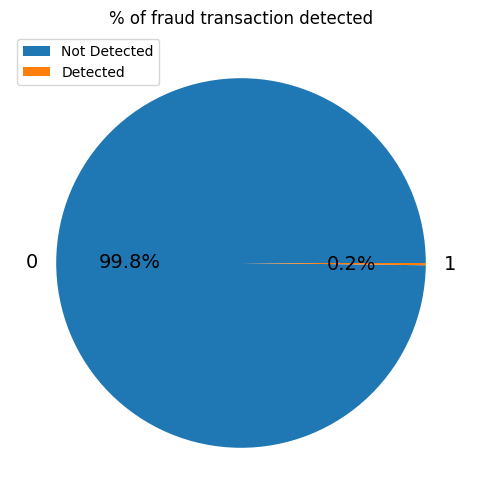

In [29]:
piedata = df.groupby(['isFlaggedFraud']).sum()
f, axes = plt.subplots(1,1, figsize=(6,6))
axes.set_title("% of fraud transaction detected")
piedata.plot(kind='pie',y='isFraud',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%');
axes.set_ylabel('');
plt.legend(loc='upper left',labels=['Not Detected','Detected'])
plt.show()

<Axes: title={'center': 'isFraud vs count'}, xlabel='isFraud', ylabel='count'>

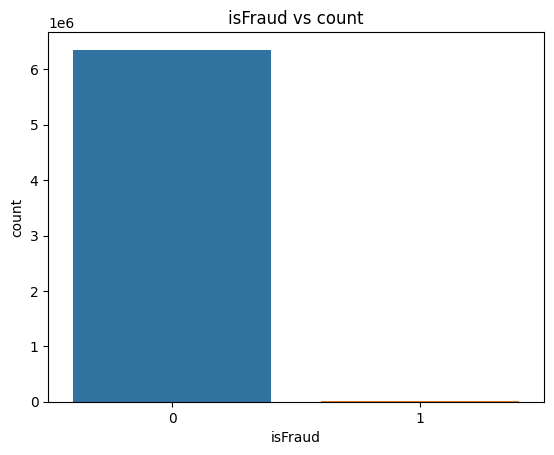

In [79]:
plt.title('isFraud vs count')
sns.countplot(data=df,x='isFraud')

In [30]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**Class Count**

In [31]:
class_count_0,class_count_1 = df['isFraud'].value_counts()

In [32]:
class_0 = df[df['isFraud'] == 0]
class_1 = df[df['isFraud'] == 1]
print('class 0:',class_0.shape)
print('class 1:',class_1.shape)

class 0: (6354407, 11)
class 1: (8213, 11)


In [33]:
class_0_under = class_0.sample(class_count_1)
balanced_data = pd.concat([class_0_under, class_1],axis=0)

**plot the count after under-sampeling**

total class of 1 and 0: 0    8213
1    8213
Name: isFraud, dtype: int64


<Axes: title={'center': 'count\xa0(target)'}>

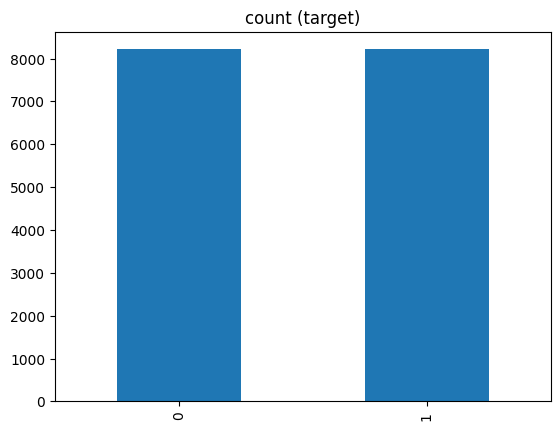

In [34]:
print("total class of 1 and 0:",balanced_data['isFraud'].value_counts())
balanced_data['isFraud'].value_counts().plot(kind='bar', title='count (target)')

In [35]:
balanced_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3945553,286,PAYMENT,13433.30,C1555888372,30895.0,17461.70,M1864889057,0.00,0.00,0,0
1521219,153,CASH_IN,39938.22,C1822106489,150889.0,190827.22,C1328263070,3215934.30,3175996.08,0,0
1293901,136,CASH_OUT,382561.40,C154556816,0.0,0.00,C760238206,1404351.28,1786912.68,0,0
895074,42,CASH_OUT,91701.48,C980744049,0.0,0.00,C943166837,3288187.44,3379888.92,0,0
2672269,210,PAYMENT,341.35,C201541230,73400.0,73058.65,M1395120172,0.00,0.00,0,0


In [46]:
balanced_data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
balanced_data['type']=la.fit_transform(balanced_data['type'])

In [48]:
x=balanced_data.iloc[:,:-1].values
y=balanced_data.iloc[:,-1].values

Splitting the data using train test split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Feature Scaling for better performance as some of the columns have high values

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
prediction=model.predict(x_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1630
           1       0.95      0.84      0.89      1656

    accuracy                           0.90      3286
   macro avg       0.90      0.90      0.89      3286
weighted avg       0.90      0.90      0.89      3286



In [55]:
print(confusion_matrix(y_test,prediction))

[[1553   77]
 [ 268 1388]]


In [56]:
print(accuracy_score(y_test,prediction))

0.8950091296409007


**DecisionTree Classifier**

In [57]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy',random_state=0)
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [58]:
y_pred=DT.predict(x_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75      1630
           1       0.94      0.37      0.53      1656

    accuracy                           0.67      3286
   macro avg       0.77      0.67      0.64      3286
weighted avg       0.77      0.67      0.64      3286



In [60]:
print(confusion_matrix(y_test,y_pred))

[[1591   39]
 [1038  618]]


In [61]:
print(accuracy_score(y_test,y_pred))

0.6722458916615947


**RandomForest**

In [62]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)

classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [63]:
y_pred=classifier.predict(x_test)

In [64]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1630
           1       1.00      0.36      0.53      1656

    accuracy                           0.68      3286
   macro avg       0.80      0.68      0.64      3286
weighted avg       0.80      0.68      0.64      3286



In [65]:
print(accuracy_score(y_test,y_pred))

0.6758977480219112


In [66]:
print(confusion_matrix(y_test,y_pred))

[[1629    1]
 [1064  592]]


**Compare the Models **

In [67]:
result = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','Random Forest'],
                       'Score':[0.8950091296409007,0.6722458916615947,0.6758977480219112]})
result

,Model,Score
0,Logistic Regression,0.895009
1,Decision Tree,0.672246
2,Random Forest,0.675898


In [68]:
result1 = result.sort_values(by = 'Score',ascending = False)
result1

,Model,Score
0,Logistic Regression,0.895009
2,Random Forest,0.675898
1,Decision Tree,0.672246


In [69]:
result1 = result1.set_index('Score')
result1

,Model
Score,
0.895009,Logistic Regression
0.675898,Random Forest
0.672246,Decision Tree
